<BR>
<FONT SIZE="7">様々な最小二乗学習</FONT>
<BR>
Source: https://qiita.com/kotaroito/items/4eb29d42d7f8c534332f
<BR>
(scikit-learnで線形モデルとカーネルモデルの回帰分析をやってみた - イラストで学ぶ機会学習)

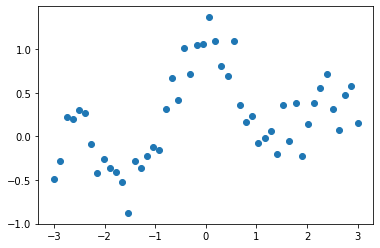

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n = 50; N = 1000

x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)

x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x,y)

<BR>
<font size="7">1. 線形モデルによる回帰</font>

0.12479169412256896


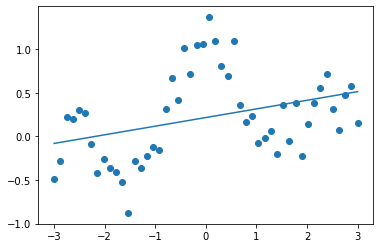

In [2]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X,p)

print(clf.score(x, y))

<BR>
<font size="7">2. カーネルモデルによる回帰</font>

0.9281469914102684


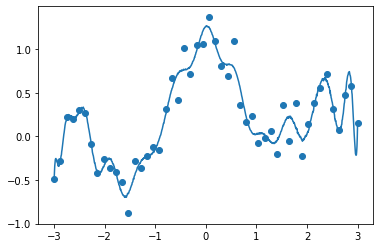

In [3]:
from sklearn.metrics.pairwise import rbf_kernel

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = LinearRegression()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

<BR>
<font size="7">3. L2制約付きカーネルモデル回帰</font>

0.8125844243054376


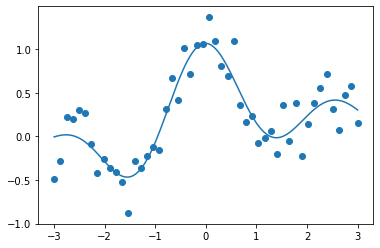

In [8]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Ridge()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

学習したパラメータの表示

In [9]:
print(clf.coef_)

[[-0.06076701 -0.01054298  0.03690403  0.07550003  0.10011339  0.10745977
   0.09670685  0.0696496   0.03042232 -0.01518426 -0.06065172 -0.09971821
  -0.12723547 -0.13976421 -0.1358457  -0.1159622  -0.08225617 -0.03810725
   0.01233547  0.06459372  0.11423636  0.15718898  0.18999401  0.21004138
   0.21577609  0.20686754  0.18430577  0.15038133  0.10851445  0.06292431
   0.01816483 -0.02141196 -0.05218022 -0.07166393 -0.07878886 -0.07392642
  -0.05873454 -0.03583795 -0.00841483  0.02023677  0.04708826  0.0696806
   0.08631294  0.09611724  0.09903021  0.09568248  0.08722865  0.07514411
   0.06101488  0.04634564]]


<BR>
<font size="7">4. L1制約付き回帰（LASSO回帰）</font>

0.7653127577740497


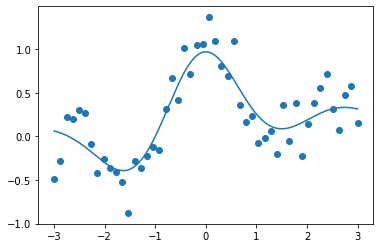

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Lasso(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y)) # 0.820550922167

In [0]:
学習したパラメータの表示。L1制約によりスパース学習されていることを確認。

In [6]:
print(clf.coef_)

[-0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.61865004 -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.9996286   0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.19919188 -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.24054595  0.
  0.          0.        ]


In [7]:
#おまけ(内部パラメータやメソッドを表示)
print(dir(clf))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_set_intercept', 'alpha', 'coef_', 'copy_X', 'dual_gap_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'l1_ratio', 'max_iter', 'n_iter_', 'normalize', 'path', 'positive', 'precompute', 'predict', 'random_state', 'score', 'selection', 'set_params', 'sparse_coef_', 'tol', 'warm_start']
